<a href="https://colab.research.google.com/github/nikhilcms/Find-Image-Resolution-using-CNN-Regressor/blob/master/snookerball_detection_and_collor_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv 
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")
!ls

 10.jpg   43.jpg			        matelab_assignment.py
 11.jpg   44.jpg			        name_entity_extraction.py
 12.jpg   45.jpg			        name_entity_recognition1.ipynb
 13.jpg   46.jpg			        Name_entity_recognition.ipynb
 14.jpg   47.jpg			        pca_time_series.ipynb
 15.jpg   48.jpg			        question_one.ipynb
 16.jpg   49.jpg			        ravdess_dataset.ipynb
 17.jpg   4.jpg				        resolution_adam.ipynb
 18.jpg   50.jpg			        sentiment_analysis.ipynb
 19.jpg   5.jpg				        sentiment_analysis_update.ipynb
 1.jpg	  6.jpg				        svd_resolution.ipynb
 20.jpg   7.jpg				        Task1.ipynb
 21.jpg   8.jpg				        Task2.ipynb
 22.jpg   9.jpg				        Task.zip
 23.jpg   alphabet_prediction1.ipynb	       'Text extraction..gslides'
 24.jpg   arima_model_analysis.pynb	        Time_series_analysis.ipynb
 25.jpg   assignment_update_again1.ipynb        time_series_f.ipynb
 26.jpg   autoencoder_code.ipynb	        topic_modeling.ipynb
 27.jpg   autoencoder.ipynb		        Untitled


In [ ]:
'''
import zipfile
with zipfile.ZipFile("Colab Notebooks/Task.zip", 'r') as zip_ref:
    zip_ref.extractall("Colab Notebooks/")
'''

In [ ]:
import numpy as np
import cv2 as cv 
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(720, 1280, 3)

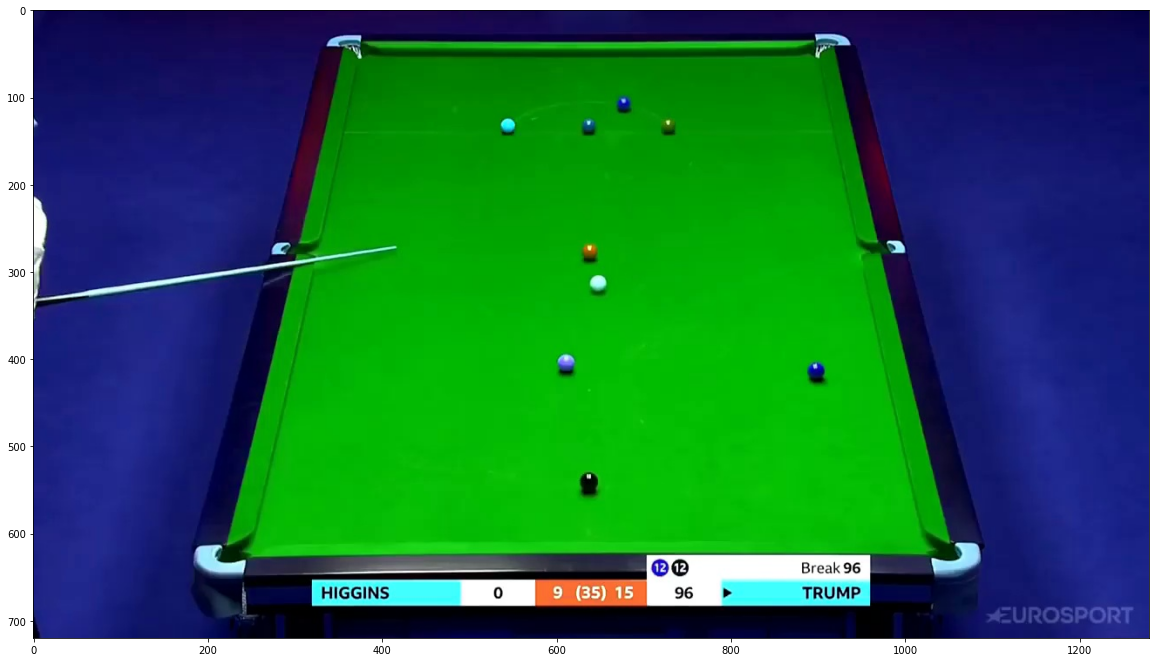

In [ ]:
#base_folder = 'Colab Notebooks/'
path_image1 = os.path.join(base_folder, "1.jpg")                 # change the image file
image = cv.imread("2.jpg")
plt.imshow(image)
image.shape

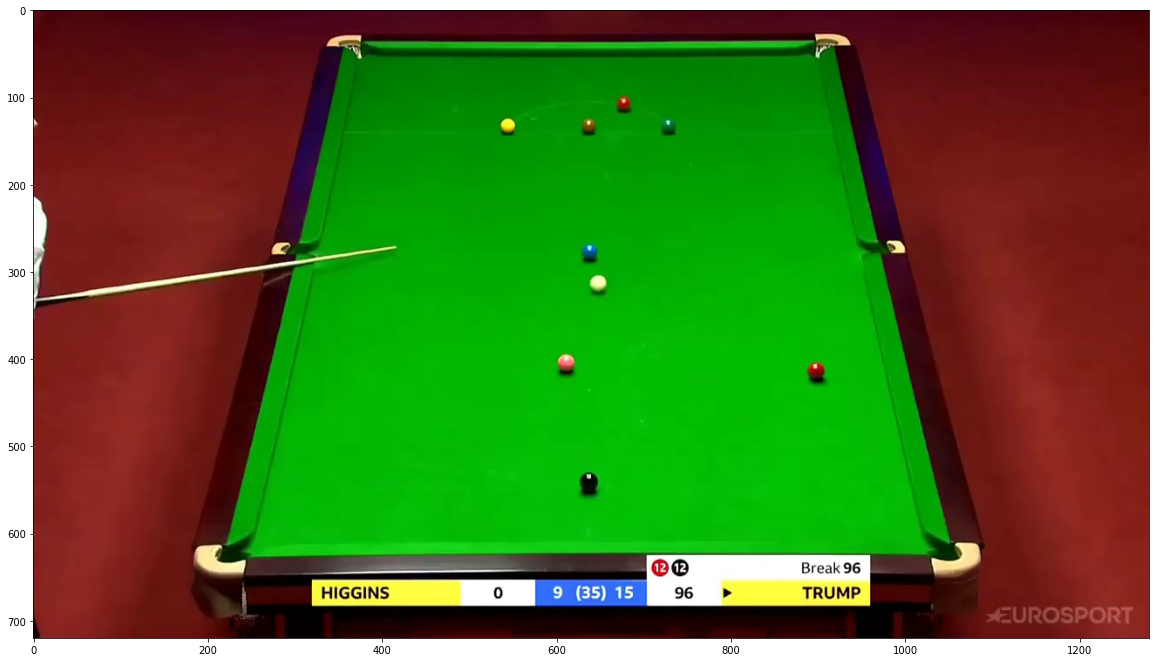

In [ ]:
from PIL import Image
Img = Image.open("2.jpg")
I = np.asarray(Img)
plt.imshow(I)

In [ ]:
#=====================ball color save=====================#    # do not change this
#path_image = os.path.join(base_folder, "1.jpg")
Img = Image.open("1.jpg")
Im = np.asarray(Img)
red_ball = Im[155:187,795:829]
white_ball = Im[272:297,360:394]
black_ball = Im[517:561,613:653]
blue_ball = Im[267:294,617:651]  
yellow_ball = Im[125:149,523:557]
pink_ball = Im[397:423,589:625] 
brown_ball = Im[123:149,616:649]
green_ball = Im[121:148,707:741]
base_color = Im[400:450,400:450]
all_ball = [red_ball,white_ball,black_ball,blue_ball,yellow_ball,pink_ball,brown_ball,green_ball]
ball_color = ['red','white','black','blue','yellow','pink','brown','green']


In [ ]:
# extract the table
def find_table(image, show_results=True):

    low_green = (46, 100, 0)
    high_green = (85, 255, 255)

    image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    # get the mask for green
    mask_table_hsv = cv.inRange(image_hsv, low_green, high_green)
    if show_results:
      plt.imshow(mask_table_hsv)
      
        #cv.imshow('mask_table_hsv', mask_table_hsv)
        #cv.waitKey(0)
        

    kernel = np.ones((15, 15), np.uint8)
    mask_table_hsv = cv.dilate(mask_table_hsv, kernel, iterations=2)
    if show_results: 
        plt.imshow(mask_table_hsv)
        #cv.waitKey(0)

    mask_table_hsv = cv.erode(mask_table_hsv, kernel, iterations=2)
    if show_results:
      plt.imshow(mask_table_hsv) 
        #cv.imshow('mask_table_hsv_erosion', mask_table_hsv)
        #cv.waitKey(0)

    table = cv.bitwise_and(image, image, mask=mask_table_hsv)  
    
    if show_results:
      plt.imshow(table) 
        #cv.imshow('table', table) 
        #cv.waitKey(0)
        #cv.destroyAllWindows()
    
    return table, mask_table_hsv

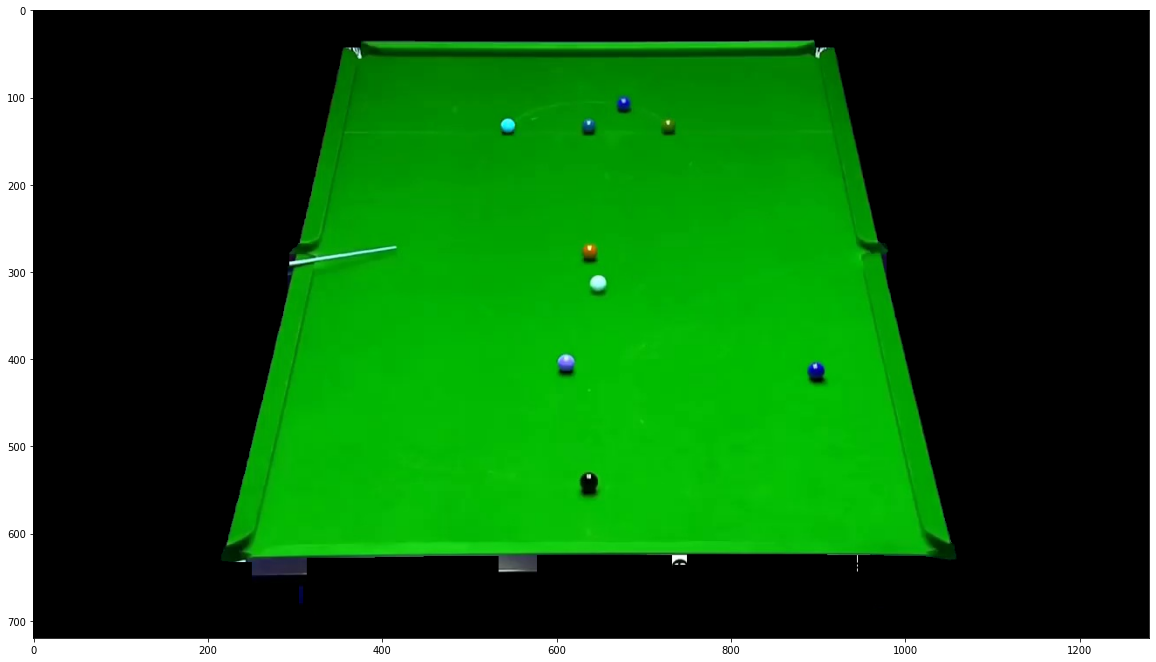

In [ ]:
table, mask_table_hsv = find_table(image)

In [ ]:
def detect_balls_using_hsv(table, show_results=True): 
    
    table_hsv = cv.cvtColor(table,cv.COLOR_BGR2HSV)
    
    #snooker balls based on color
    low_red = np.array([0, 200, 0])
    high_red =np.array([10, 255, 255])
    mask_red = cv.inRange(table_hsv, low_red, high_red)
    red_ball = cv.bitwise_and(table, table, mask=mask_red)
        
    low_white = np.array([0, 0, 200])
    high_white = np.array([255, 255, 255])        
    mask_white = cv.inRange(table_hsv, low_white, high_white)
    white_ball = cv.bitwise_and(table, table, mask=mask_white)    
        
    low_black = np.array([0, 0, 0])
    high_black = np.array([255, 255, 75])        
    mask_black = cv.inRange(table_hsv, low_black, high_black)          
    black_ball = cv.bitwise_and(table, table, mask=mask_black)   
        
    low_pink = np.array([0, 0, 0])
    high_pink = np.array([23, 150, 255])        
    mask_pink = cv.inRange(table_hsv, low_pink, high_pink)
    pink_ball = cv.bitwise_and(table, table, mask=mask_pink) 
        
    low_blue = np.array([80,200,0])
    high_blue =np.array([150,255,255])
    mask_blue = cv.inRange(table_hsv, low_blue, high_blue)
    blue_ball = cv.bitwise_and(table, table, mask=mask_blue)
           
    low_brown = np.array([10, 100, 0])
    high_brown = np.array([45, 200, 150])        
    mask_brown = cv.inRange(table_hsv, low_brown, high_brown)
    brown_ball = cv.bitwise_and(table, table, mask=mask_brown)
        
    low_green = np.array([65, 0, 0])
    high_green = np.array([80, 255, 255])        
    mask_green = cv.inRange(table_hsv, low_green, high_green)
    green_ball = cv.bitwise_and(table, table, mask=mask_green)       
        
    low_yellow = np.array([25, 150, 150])
    high_yellow = np.array([40, 255, 255])        
    mask_yellow = cv.inRange(table_hsv, low_yellow, high_yellow)
    yellow_ball = cv.bitwise_and(table, table, mask=mask_yellow)    

    
    mask_balls = mask_white + mask_red + mask_blue + mask_pink + mask_green + mask_brown + mask_yellow + mask_black

    balls = cv.bitwise_and(table,table,mask=mask_balls) 
    if show_results:
        cv.imshow("Table", table)
        cv.imshow("BALLS", balls)
        cv.imshow("Mask balls", mask_balls)

        cv.waitKey(0)
        cv.destroyAllWindows()
        
    return table, balls, mask_balls
    

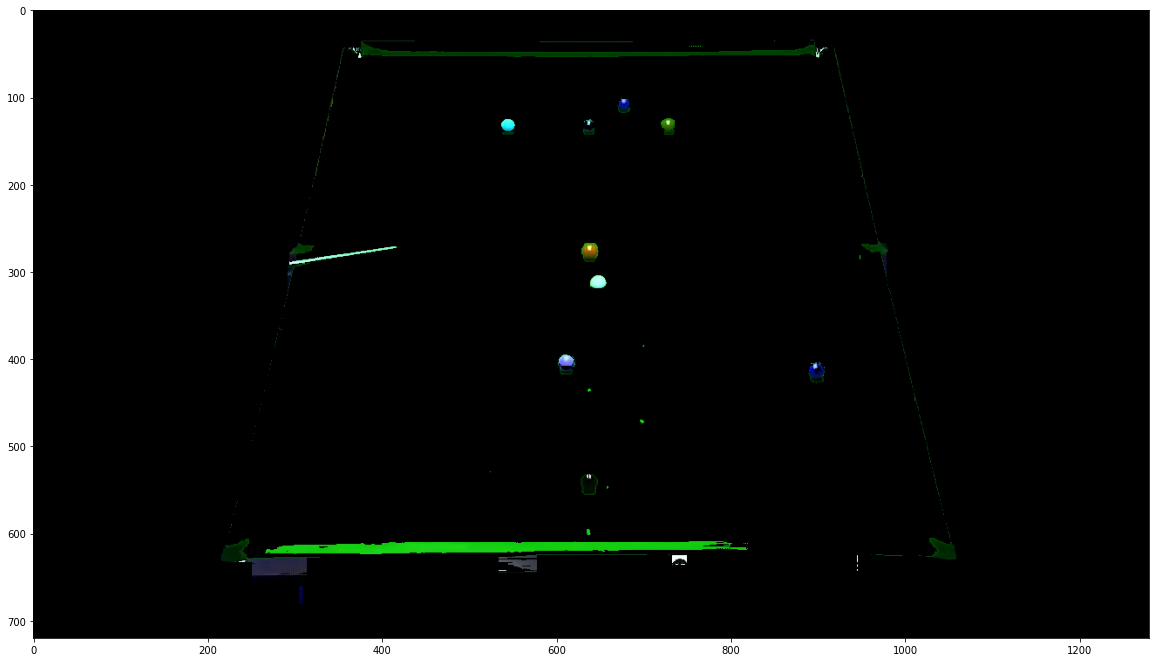

In [ ]:
show_results = False

table, mask_table_hsv = find_table(image, show_results)      
contours, _ = cv.findContours(mask_table_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   
max_area = 0        
img_contour = np.zeros(table.shape, np.uint8)

# take the largest in area contour
if len(contours) > 0:
    cnt = contours[0]
    for i, cont in enumerate(contours):   
        contour_area = cv.contourArea(cont)            
        if contour_area > max_area:
            max_area = contour_area
            cnt = contours[i]     

    epsilon = 0.01 * cv.arcLength(cnt, True) # contour perimeter
    approx = cv.approxPolyDP(cnt, epsilon, True) # get the approximation
    hull = cv.convexHull(cnt)
    cv.drawContours(img_contour, cnt, -1, (0, 255, 0), 3)
    cv.drawContours(img_contour, [approx], -1, (0, 0, 255), 3)
    cv.drawContours(img_contour, hull, -1, (255, 0, 0), 3) # only displays a few points as well.
    if show_results:
      plt.imshow(img_contour)
        #cv.imshow('img_contour', img_contour)
        #cv.waitKey(0)
        #cv.destroyAllWindows()

table, balls, mask_balls = detect_balls_using_hsv(table, show_results)    
plt.imshow(balls)
#cv.imshow('balls', balls)  

#cv.waitKey(0)
#cv.destroyAllWindows()

In [ ]:

import cv2
import numpy as np
imm2 = table.copy()
gray = cv2.cvtColor(imm2, cv2.COLOR_BGR2GRAY)
#img = cv2.imread('shadows.png', -1)

rgb_planes = cv2.split(gray)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)


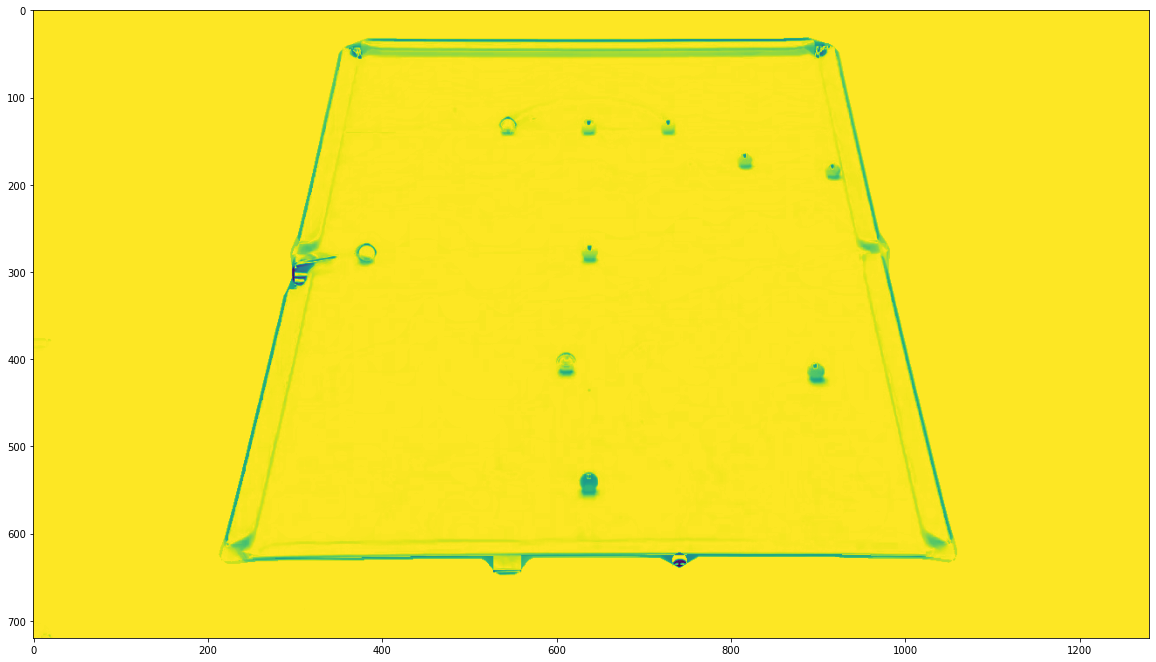

In [ ]:
plt.imshow(result)

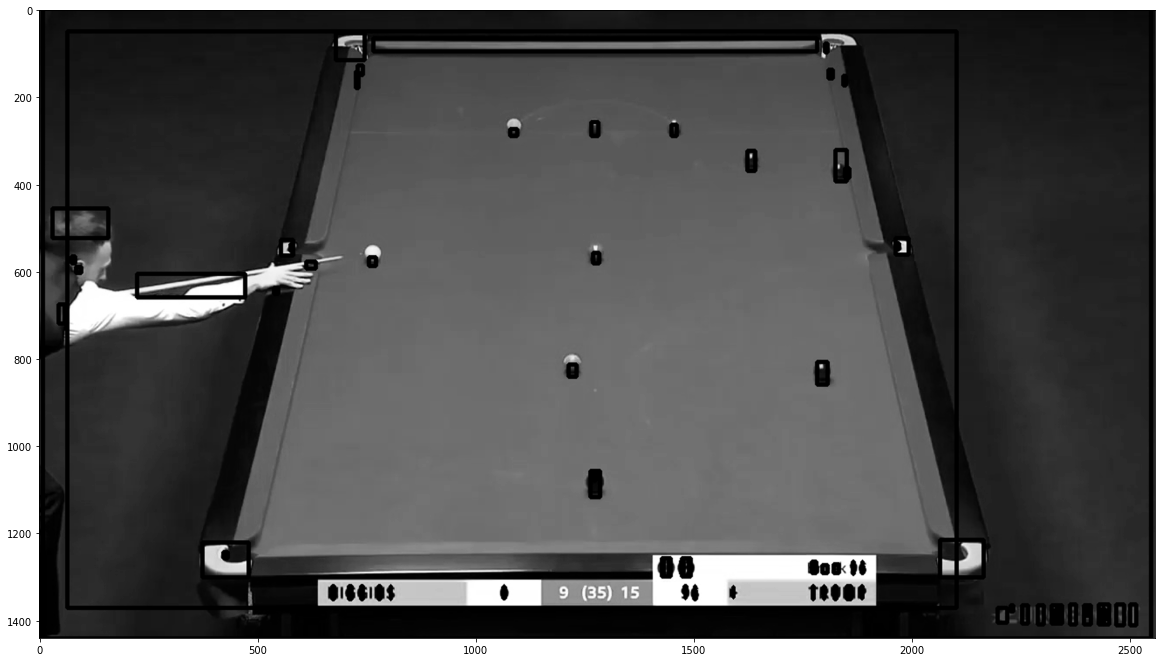

In [ ]:
#=======================contour detection=======================#
import statistics                  
imm = I.copy()
gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#im21, contours1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours1, _ = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])

heightlist.sort()
sportion = int(.5*len(heightlist))
eportion = int(0.08*len(heightlist))
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = gray.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.4*medianheight and w/h > 0.3):
        cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,0,255),3)
        box.append([x,y,x+w,y+h])
    # to show image
#image = 255 - imag  
imgplot = plt.imshow(cv2.resize(imag, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [ ]:
box

[[0, 0, 1280, 720],
 [28, 26, 1057, 685],
 [336, 28, 378, 57],
 [379, 34, 897, 47],
 [900, 40, 906, 48],
 [367, 65, 370, 74],
 [906, 70, 910, 78],
 [362, 72, 368, 89],
 [921, 77, 927, 86],
 [629, 130, 646, 144],
 [721, 133, 736, 144],
 [536, 138, 553, 144],
 [909, 162, 931, 196],
 [808, 163, 826, 184],
 [925, 183, 929, 192],
 [11, 229, 84, 261],
 [978, 263, 1002, 280],
 [273, 265, 296, 281],
 [982, 269, 989, 274],
 [285, 270, 293, 276],
 [631, 280, 647, 290],
 [37, 284, 42, 290],
 [374, 285, 391, 293],
 [302, 290, 322, 296],
 [44, 296, 47, 301],
 [108, 304, 241, 329],
 [265, 320, 279, 325],
 [18, 339, 34, 359],
 [888, 405, 909, 429],
 [603, 408, 621, 420],
 [628, 530, 648, 558],
 [634, 531, 641, 539],
 [1029, 609, 1088, 650],
 [183, 612, 245, 650],
 [212, 623, 216, 628],
 [733, 630, 752, 649],
 [710, 630, 729, 649],
 [741, 633, 750, 646],
 [734, 633, 741, 646],
 [718, 633, 727, 646],
 [712, 633, 719, 646],
 [940, 634, 949, 645],
 [930, 634, 938, 646],
 [887, 634, 891, 645],
 [913, 637,

In [ ]:
#================filter contour====================#

box1 = [i for i in box if i[2] - i[0] < 30 and i[2]-i[0]>8 and i[0]>50 and i[1]>50 and i[2]>50 and i[3]>50]
#box1 = [i for i in box if i[0]>50 and i[1]>50 and i[2]>50 and i[3]>50]
base_bl = base_color.copy()
from sklearn.metrics.pairwise import cosine_similarity
box3 = []
for i in box1:
    ball = [i[0]-5,i[1]-5,i[2]+5,i[3]+5]
    temp_ball = table[ball[1]:ball[3],ball[0]:ball[2]]
    base_ball = cv2.resize(base_bl,(temp_ball.shape[1],temp_ball.shape[0]))
    a = temp_ball.flatten() ; b = base_ball.flatten()
    if cosine_similarity([a],[b])[0][0] > 0.7:
        box3.append(i)

In [ ]:
box1

Number of ball used: 11


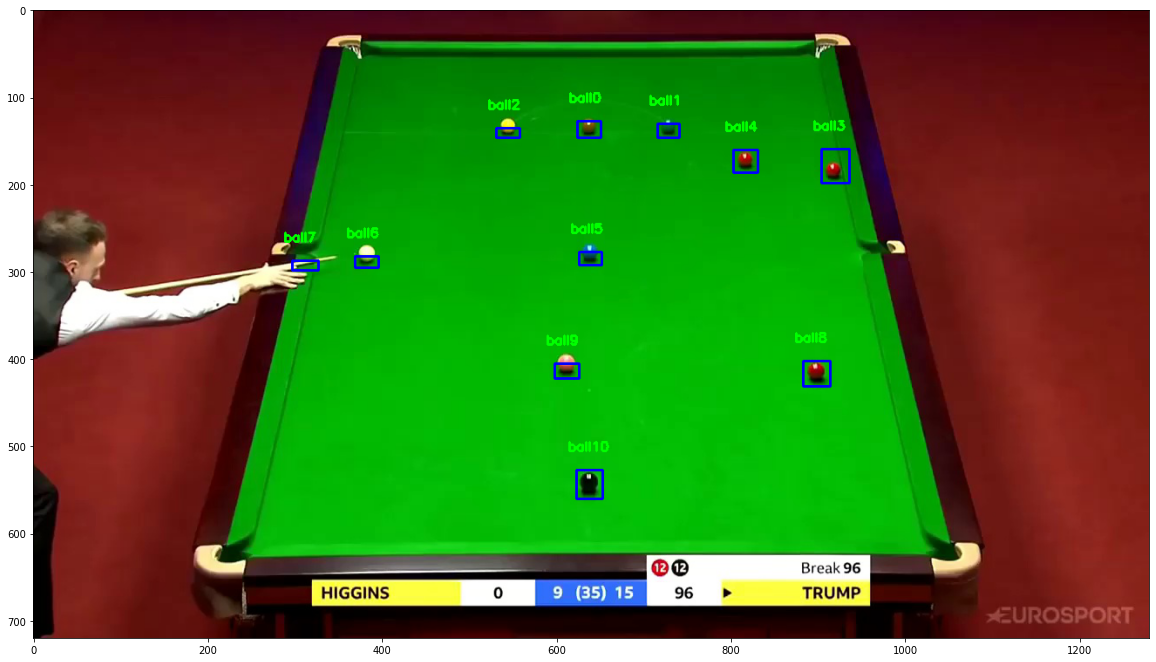

In [ ]:
#=================calculte total number of balls======================#
bs = I.copy()
box_update = []
for j,i in enumerate(box3):
  boxx = [i[0]-10,i[1]-10,i[2]+5,i[3]+5]
  box_update.append(boxx)
  label = "ball"+str(j)
  cv2.rectangle(bs,(i[0]-5,i[1]-3),(i[2]+5,i[3]+2),(0,0,255),2)
  cv2.putText(bs,label, (i[0]-15, i[1]-15 - 10),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(bs)
print("Number of ball used:",len(box_update))

In [ ]:
#======================Ball Color Information============#
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
from skimage.transform import resize
all_colorr = []
for i in box_update:
  ball = I[i[1]:i[3],i[0]:i[2]]
  #print(i)
  resized_ball = [ Image.fromarray(i.astype('uint8'), 'RGB').resize((ball.shape[1],ball.shape[0]),Image.ANTIALIAS) for i in all_ball]   

  color = []
  for resizeb in resized_ball:
    bb = np.asarray(resizeb)
    a = ball.flatten() ; b = bb.flatten()
    ss = euclidean_distances([a],[b])[0][0]
    color.append(ss)
  if color.index(max(color)) == 7:
    temp = sorted(color, reverse = True)
    diff = temp[0]-temp[1] > 0.9
    final = ball_color[color.index(temp[1])]
  else:
    final = ball_color[color.index(max(color))]
  all_colorr.append(final)
  #print("color of ball is:",final)
  

In [ ]:
i = box_update[1]
ball = I[i[1]:i[3],i[0]:i[2]]
#print(i)
resized_ball = [ Image.fromarray(i.astype('uint8'), 'RGB').resize((ball.shape[1],ball.shape[0]),Image.ANTIALIAS) for i in all_ball]   

In [ ]:
!pip install imagehash

     |████████████████████████████████| 296kB 2.8MB/s 
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=fd68b04eafc17a63ffadea1c5f89bfcd267a688bb783d180967270eaf5fb111a
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built imagehash


In [ ]:
from PIL import Image
import imagehash
i = box_update[0]
hash0 = imagehash.average_hash(Image.fromarray(I[i[1]:i[3],i[0]:i[2]].astype('uint8'), 'RGB'))
hash1 = imagehash.average_hash(resized_ball[6])
cutoff = 5
print( hash0 - hash1)
if hash0 - hash1 < cutoff:
  print('images are similar')
else:
  print('images are not similar')

44
images are not similar


In [ ]:
from PIL import Image
from PIL import ImageFilter
import imagehash
i = box_update[3]
img1 = Image.fromarray(I[i[1]:i[3],i[0]:i[2]].astype('uint8'), 'RGB')
img2 = (resized_ball[5])
img1=img1.filter(ImageFilter.BoxBlur(radius=3))
img2=img2.filter(ImageFilter.BoxBlur(radius=3))
phashvalue=imagehash.phash(img1)-imagehash.phash(img2)
ahashvalue=imagehash.average_hash(img1)-imagehash.average_hash(img2)
totalaccuracy=phashvalue+ahashvalue
totalaccuracy

29

In [ ]:
from PIL import Image
import imagehash
hash0 = imagehash.average_hash(Image.open('quora_photo.jpg')) 
hash1 = imagehash.average_hash(Image.open('twitter_photo.jpeg')) 
cutoff = 5
if hash0 - hash1 < cutoff:
  print('images are similar')
else:
  print('images are not similar')


In [ ]:
#=====================final ball distribution=====================#
color_dict = {}
for i in ball_color:
  color_dict[i] = all_colorr.count(i)
print(color_dict)

{'red': 1, 'white': 14, 'black': 0, 'blue': 1, 'yellow': 1, 'pink': 0, 'brown': 0, 'green': 0}


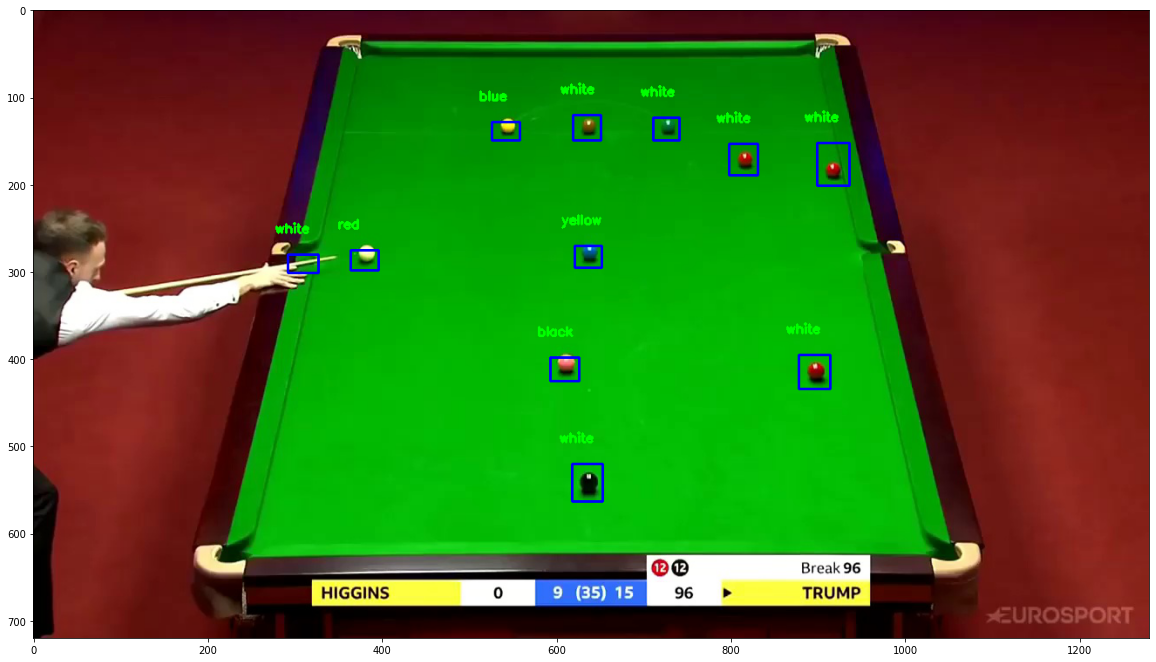

In [ ]:
#========================Ball color visualization======================#
final_img = I.copy()
for i,j in zip(box_update,all_colorr):
  label = j
  cv2.rectangle(final_img,(i[0],i[1]),(i[2],i[3]),(0,0,255),2)
  cv2.putText(final_img,label, (i[0]-15, i[1]-15 - 10),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(final_img)

In [ ]:
# we cannot detect all balls because,its depends on contour,but we detect maximum balls with its color Thank you.

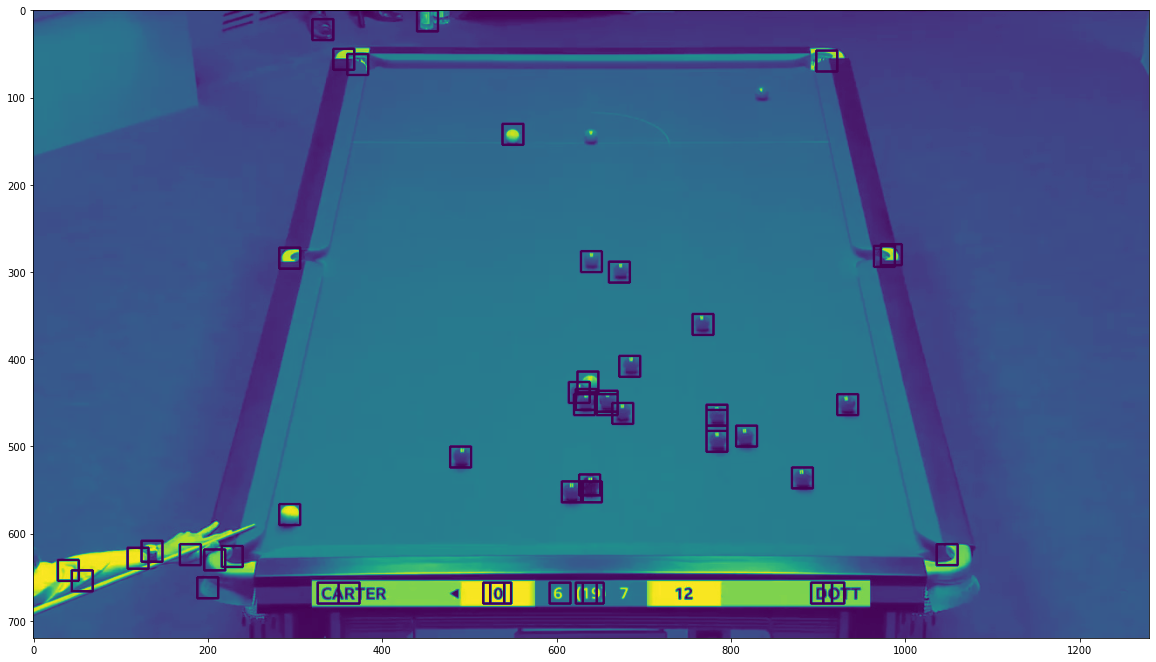

In [ ]:
plt.imshow(gray)

#=========================Using opencv function-=======================#

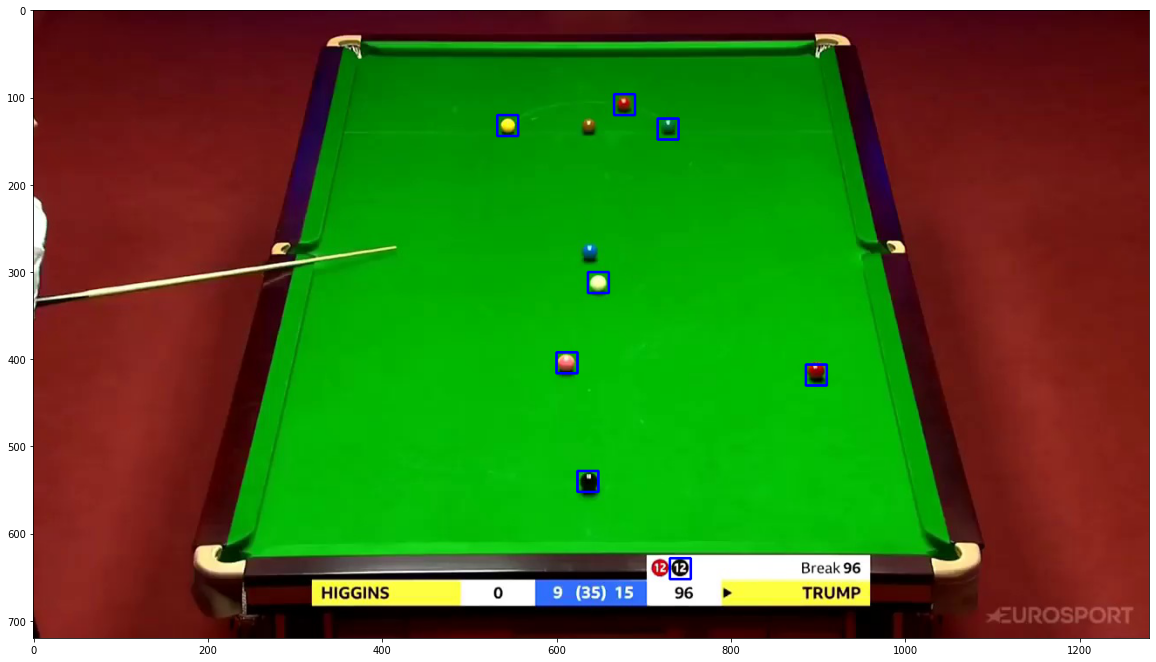

In [ ]:
import cv2
#image = cv2.imread(path_image1)
bs = I.copy()
output = table.copy()
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
#gray = cv2.threshold(gray,50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,7,param1=90,param2=11,minRadius=6,maxRadius=11)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
  boxes = []
  for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    #cv2.circle(output, (x, y), r, (0, 255, 0),0)
    cv2.rectangle(bs, (x - 12, y - 12), (x + 12, y + 12), (0,0,255),2)
    boxes.append([x-12,y-12,x+12,y+12])
    # show the output image
plt.imshow(bs)
	#cv2.waitKey(0)

In [ ]:
from scipy.spatial import distance
import pandas as pd
boxx = pd.DataFrame(boxes)
boxx1 = boxx.sort_values(by=[0])  
boxx1

0    1    2    3
1  532  120  556  144
3  600  392  624  416
4  624  528  648  552
0  636  300  660  324
5  666   96  690  120
6  716  124  740  148
7  730  628  754  652
2  886  406  910  430

In [ ]:
box = np.array(boxx1)
filter_box = [box[i] for j,i in enumerate(range(len(box)-1)) if distance.euclidean(tuple(box[i]),tuple(box[i+1])) > 12 ]
filter_box.append(box[-1])
filter_box1 = [ i for i in filter_box if i[1] < 625 and i[1] > 50]

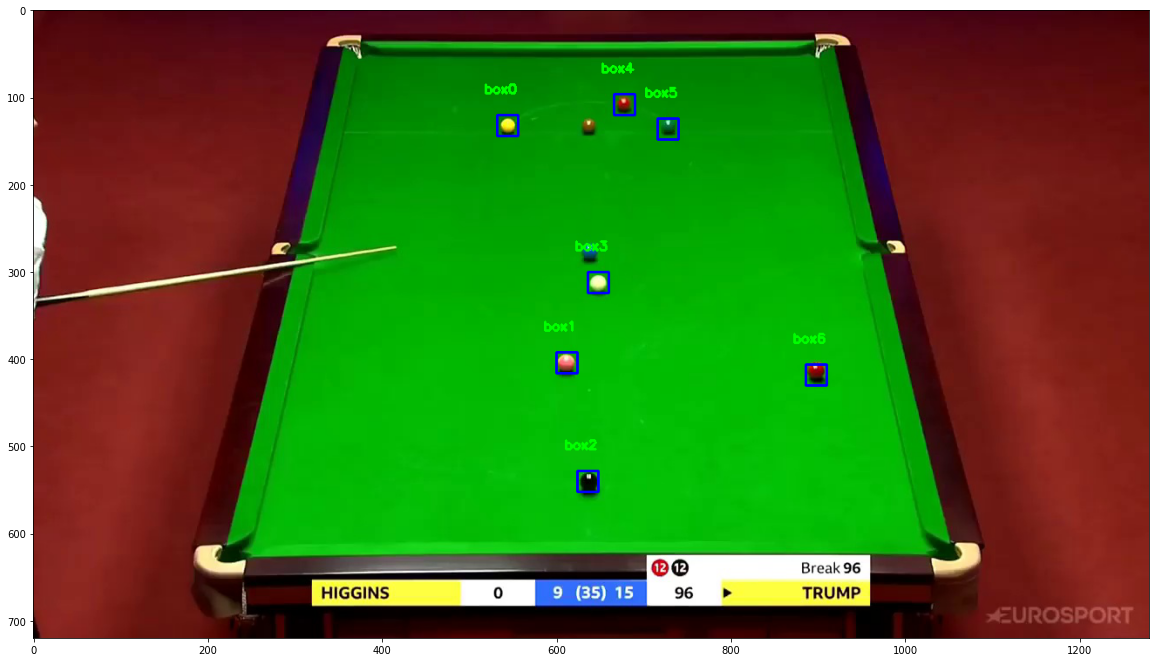

In [ ]:
final_img1 = I.copy()
filter_box1 = filter_box1
for j,i in enumerate(filter_box1):
  label = "box"+str(j)
  cv2.rectangle(final_img1,(i[0],i[1]),(i[2],i[3]),(0,0,255),2)
  cv2.putText(final_img1,label, (i[0]-15, i[1]-15 - 10),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(final_img1)

In [ ]:
box = np.array(boxx1)
filter_box = [box[i] for i in range(len(box)-1) if distance.euclidean(tuple(box[i]),tuple(box[i+1])) > 12 ]
filter_box1 = [ i for i in filter_box if i[1] < 625 and i[1] > 50]
filter_box1   

[array([370, 266, 394, 290]),
 array([532, 120, 556, 144]),
 array([600, 400, 624, 424]),
 array([626, 528, 650, 552]),
 array([626, 126, 650, 150]),
 array([804, 162, 828, 186]),
 array([886, 402, 910, 426])]

In [ ]:
distance.euclidean((598, 392, 622, 416),(600, 400, 624, 424))

11.661903789690601

In [ ]:
from scipy.spatial import distance
box = boxes.copy()
filter_box = [box[i] for i in range(len(box)-1) if distance.euclidean(tuple(box[i]),tuple(box[i+1])) > 200 ]
filter_box1 = [ i for i in filter_box if i[1] < 625 and i[1] > 50]
filter_box1              

[[370, 266, 394, 290],
 [598, 392, 622, 416],
 [908, 172, 932, 196],
 [532, 120, 556, 144],
 [804, 162, 828, 186],
 [886, 402, 910, 426],
 [600, 400, 624, 424],
 [626, 126, 650, 150]]

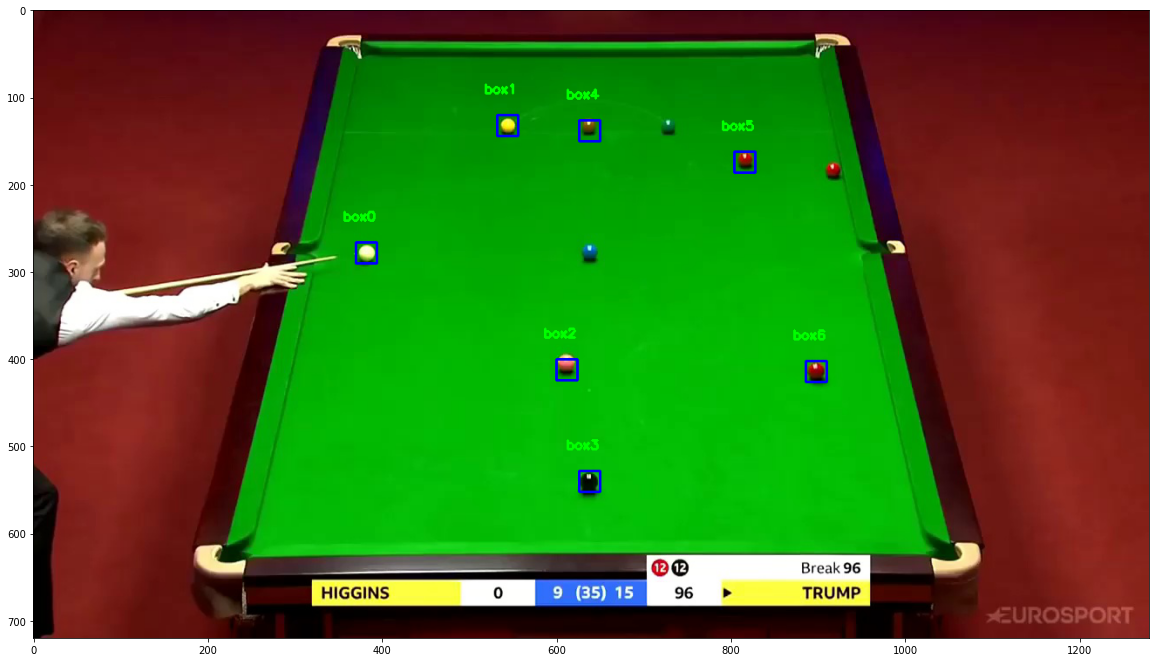

In [ ]:
final_img1 = I.copy()
filter_box1 = filter_box1
for j,i in enumerate(filter_box1):
  label = "box"+str(j)
  cv2.rectangle(final_img1,(i[0],i[1]),(i[2],i[3]),(0,0,255),2)
  cv2.putText(final_img1,label, (i[0]-15, i[1]-15 - 10),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(final_img1)

In [ ]:
final_img1

In [ ]:
ball_color

['red', 'white', 'black', 'blue', 'yellow', 'pink', 'brown', 'green']

In [ ]:
color_dict = {}
for i in ball_color:
  color_dict[i] = all_colorr.count(i)
print(color_dict)

{'red': 2, 'white': 0, 'black': 1, 'blue': 1, 'yellow': 1, 'pink': 1, 'brown': 1, 'green': 1}


In [ ]:
box_update

[[707, 121, 741, 148],
 [616, 123, 649, 149],
 [523, 125, 557, 149],
 [795, 155, 829, 187],
 [897, 164, 931, 200],
 [617, 267, 651, 294],
 [360, 272, 394, 297],
 [876, 396, 913, 433],
 [589, 397, 625, 423],
 [613, 517, 653, 561]]

In [ ]:
sd = I[397:423,589:625]
#img = Image.open(sd)
from skimage.transform import resize
bottle_resized = resize(sd, (54, 54))
bottle_resized.shape

(54, 54, 3)

In [ ]:
PIL_image = Image.fromarray(sd.astype('uint8'), 'RGB')
PIL_image

In [ ]:
ball_one = table[618:642,726:755]
base_color = bs[400:450,400:450]
#plt.imshow(base_color)
ball_one.shape

(24, 29, 3)

In [ ]:
resized_image = cv2.resize(base_color, (29,24)) 
resized_image.shape

(24, 29, 3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
a = ball_one.flatten() ; b = resized_image.flatten()
ss = cosine_similarity([a],[b])
ss[0][0]

0.4589337602477793

In [ ]:
box_update

[[707, 121, 741, 148],
 [616, 123, 649, 149],
 [523, 125, 557, 149],
 [795, 155, 829, 187],
 [897, 164, 931, 200],
 [617, 267, 651, 294],
 [360, 272, 394, 297],
 [876, 396, 913, 433],
 [589, 397, 625, 423],
 [613, 517, 653, 561],
 [726, 618, 755, 642]]

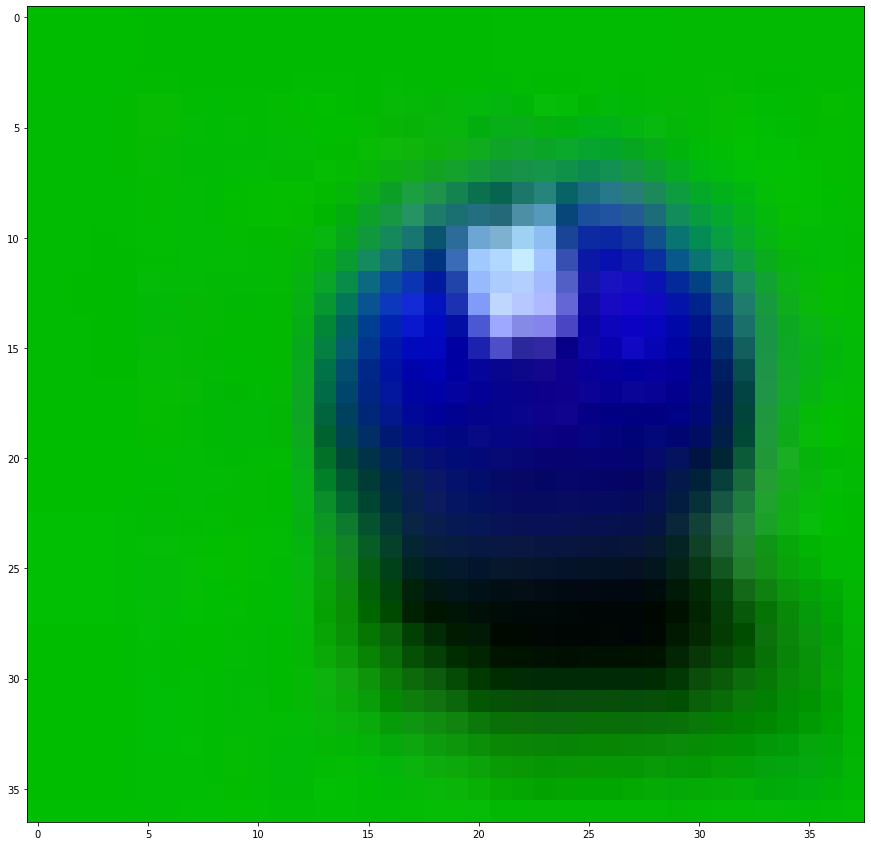

In [ ]:
ss = table.copy()
ball = box_update[7]
#cv2.rectangle(ss,(ball[0],ball[1]),(ball[2],ball[3]),(0,0,255),2)
plt.imshow(ss[ball[1]:ball[3],ball[0]:ball[2]])
#plt.imshow(ss)

In [ ]:
a = ss[ball[1]:ball[3],ball[0]:ball[2]]
a.shape
a

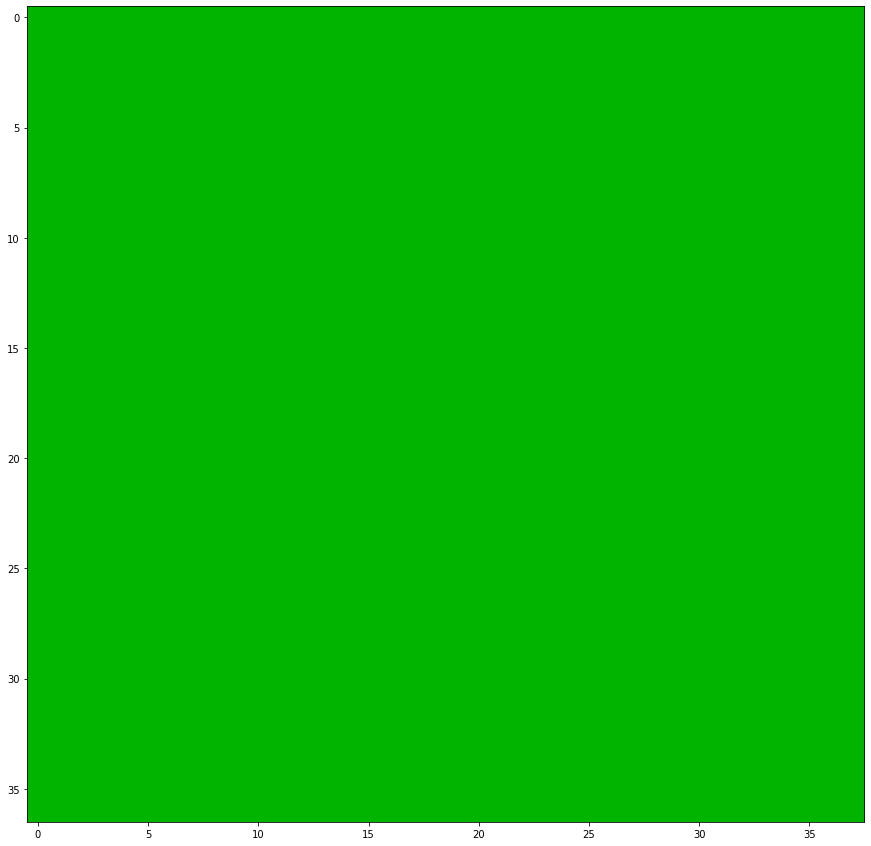

In [ ]:
# Create a blank 300x300 black image
image = np.zeros((37,38, 3), np.uint8)
# Fill image with red color(set each pixel to red)
image[:] = (0, 180, 0)
plt.imshow(image)

In [ ]:
x = a.flatten()
y = image.flatten()
from scipy import spatial
result = 1 - spatial.distance.cosine(x,y)
result

0.7983025950211937

In [ ]:
from numpy import dot
from numpy.linalg import norm
a = x ; b = y
cos_sim = dot(a, b)/(norm(a)*norm(b))
cos_sim

0.0

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([a],[b])

array([[0.82703581]])

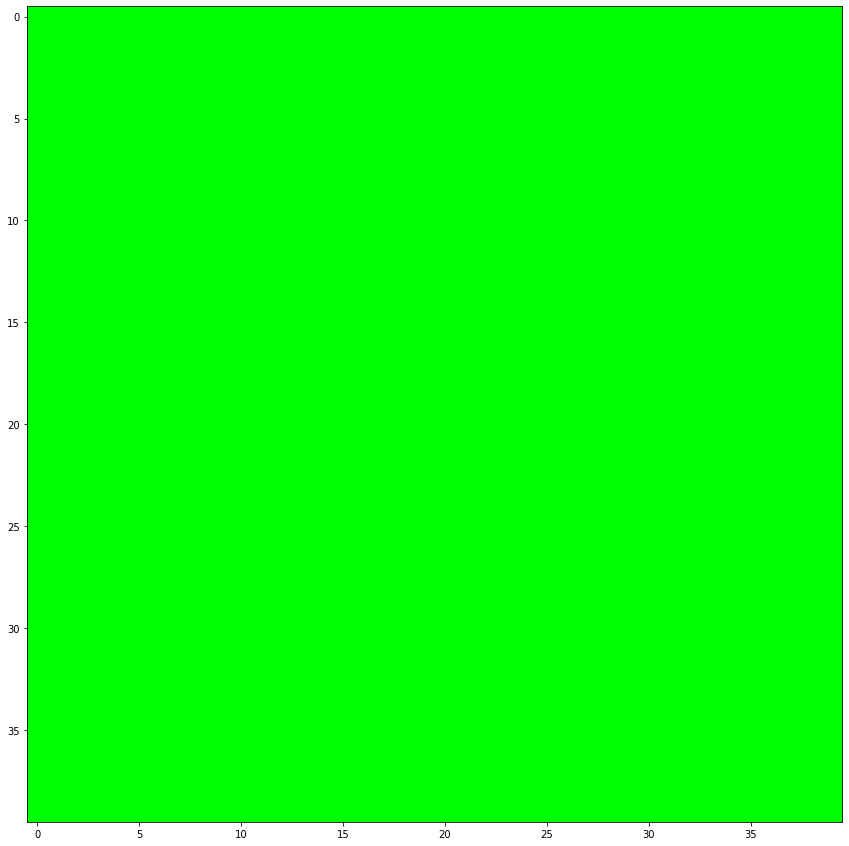

In [ ]:
# Create a blank 300x300 black image
image = np.zeros((40, 40, 3), np.uint8)
# Fill image with red color(set each pixel to red)
image[:] = (0, 255, 0)
plt.imshow(image)

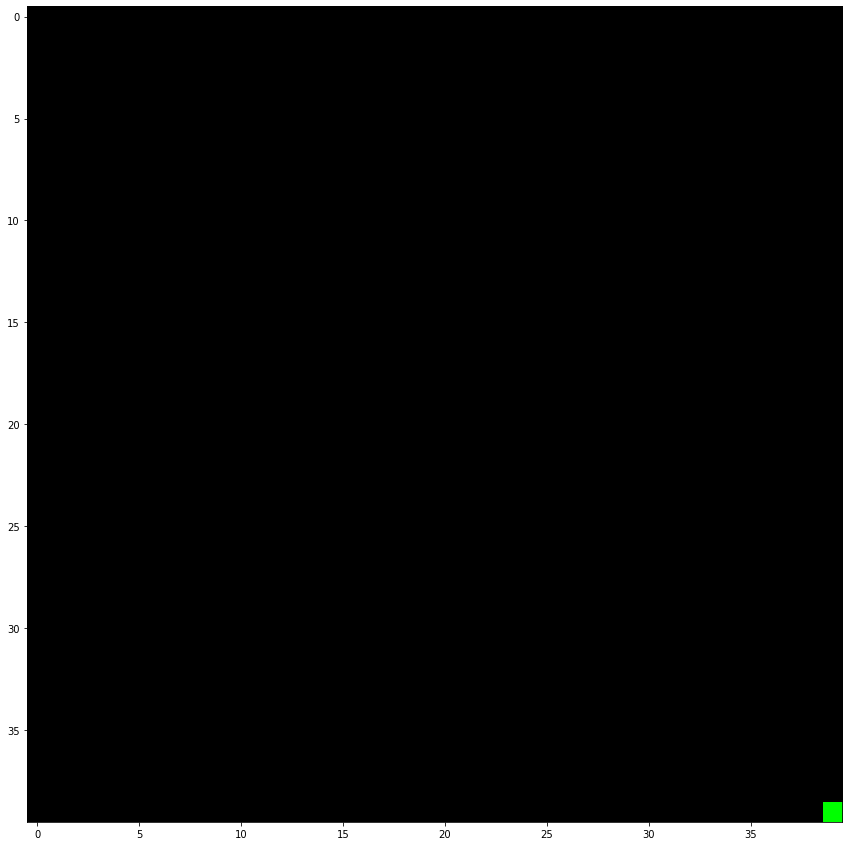

In [ ]:
query = vectorizer.transform(que)
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(query,X).flatten()

In [ ]:
data.shape

(40, 40, 3)

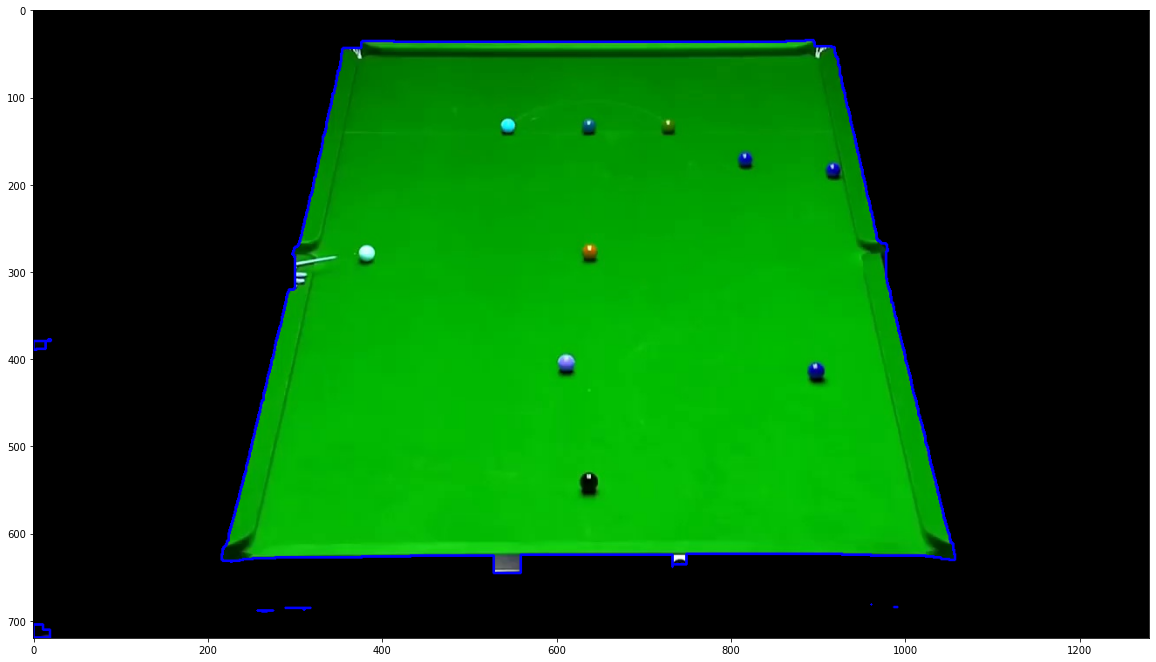

In [ ]:
table, mask_table_hsv = find_table(image, show_results)      
im = table.copy()
cnts = cv.findContours(mask_table_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
df_list = []
for c in cnts:
    temp_dict = {}
    temp_dict['TYPE'] = "horizontal"
    temp_dict['HPOS'] = min(c[:,:,0])[0]
    temp_dict['HPOS_END'] = max(c[:,:,0])[0]
    temp_dict['VPOS'] = min(c[:,:,1])[0]
    temp_dict['VPOS_DOWN'] = max(c[:,:,1])[0]
    df_list.append(temp_dict)
    cv.drawContours(im, [c], -1, (0,0,255), 2)
plt.imshow(im)

In [ ]:
df_list

[{'HPOS': 0,
  'HPOS_END': 19,
  'TYPE': 'horizontal',
  'VPOS': 704,
  'VPOS_DOWN': 719},
 {'HPOS': 257,
  'HPOS_END': 275,
  'TYPE': 'horizontal',
  'VPOS': 688,
  'VPOS_DOWN': 689},
 {'HPOS': 289,
  'HPOS_END': 318,
  'TYPE': 'horizontal',
  'VPOS': 685,
  'VPOS_DOWN': 687},
 {'HPOS': 987,
  'HPOS_END': 991,
  'TYPE': 'horizontal',
  'VPOS': 684,
  'VPOS_DOWN': 684},
 {'HPOS': 961,
  'HPOS_END': 961,
  'TYPE': 'horizontal',
  'VPOS': 681,
  'VPOS_DOWN': 681},
 {'HPOS': 0,
  'HPOS_END': 20,
  'TYPE': 'horizontal',
  'VPOS': 377,
  'VPOS_DOWN': 389},
 {'HPOS': 216,
  'HPOS_END': 1057,
  'TYPE': 'horizontal',
  'VPOS': 34,
  'VPOS_DOWN': 645}]

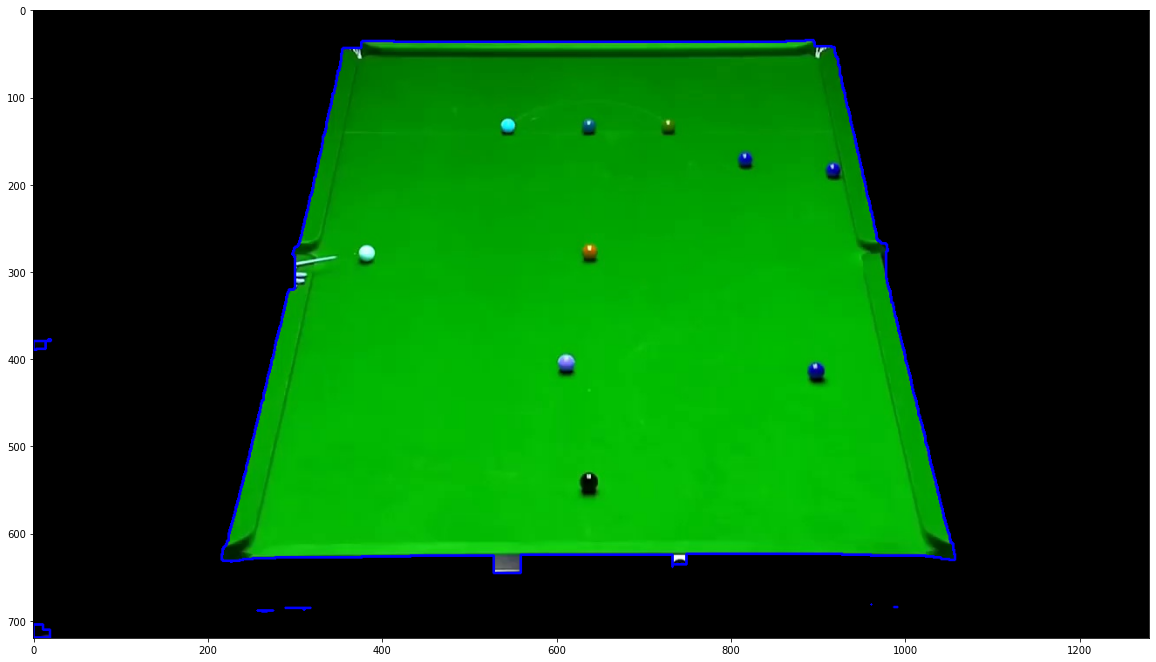

In [ ]:
contours, _ = cv.findContours(mask_table_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   
df_list = []
for c in contours:
    temp_dict = {}
    temp_dict["Area"] = cv.contourArea(c)
    temp_dict['TYPE'] = "horizontal"
    temp_dict['HPOS'] = min(c[:,:,0])[0]
    temp_dict['HPOS_END'] = max(c[:,:,0])[0]
    temp_dict['VPOS'] = min(c[:,:,1])[0]
    temp_dict['VPOS_DOWN'] = max(c[:,:,1])[0]
    df_list.append(temp_dict)
    cv.drawContours(im, [c], -1, (0,0,255), 2)
plt.imshow(im)

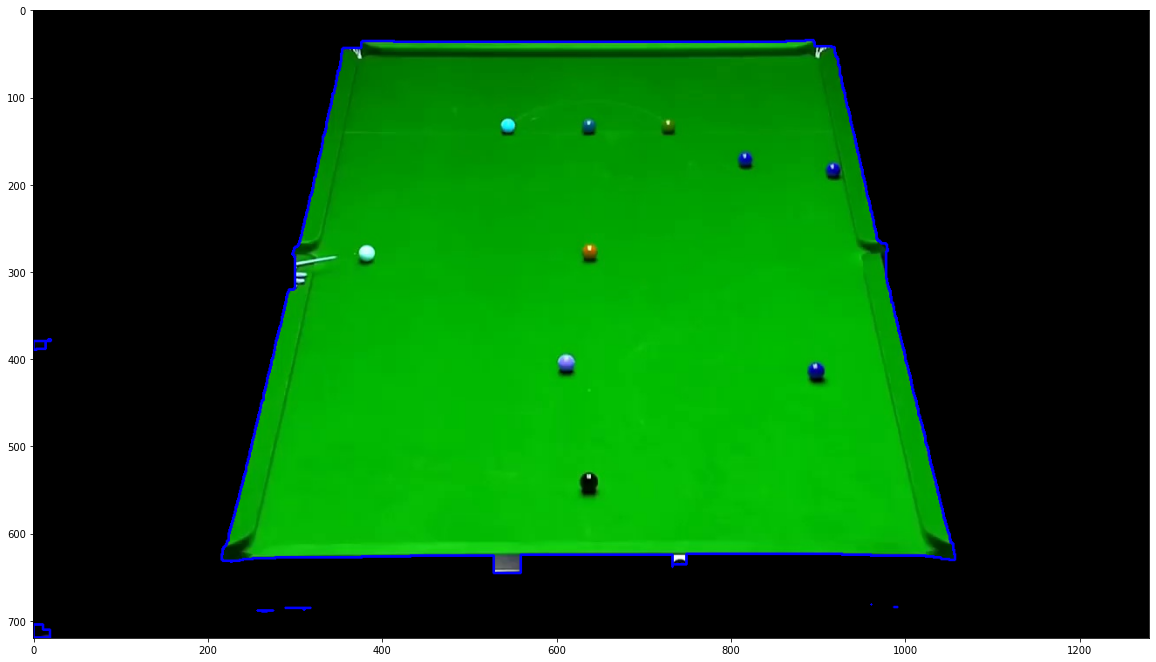

In [ ]:
gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, _ = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   
df_list = []
for c in contours:
    temp_dict = {}
    temp_dict["Area"] = cv.contourArea(c)
    temp_dict['TYPE'] = "horizontal"
    temp_dict['HPOS'] = min(c[:,:,0])[0]
    temp_dict['HPOS_END'] = max(c[:,:,0])[0]
    temp_dict['VPOS'] = min(c[:,:,1])[0]
    temp_dict['VPOS_DOWN'] = max(c[:,:,1])[0]
    df_list.append(temp_dict)
    cv.drawContours(gray, [c], -1, (0,0,255), 2)
plt.imshow(im)

In [ ]:
import statistics
dim1 = (gray.shape[1],gray.shape[0])
if(gray.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])
    
tt1 = cv2.dilate(gray,kernel1,iterations=14)
resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)
plt.imshow(resized1)

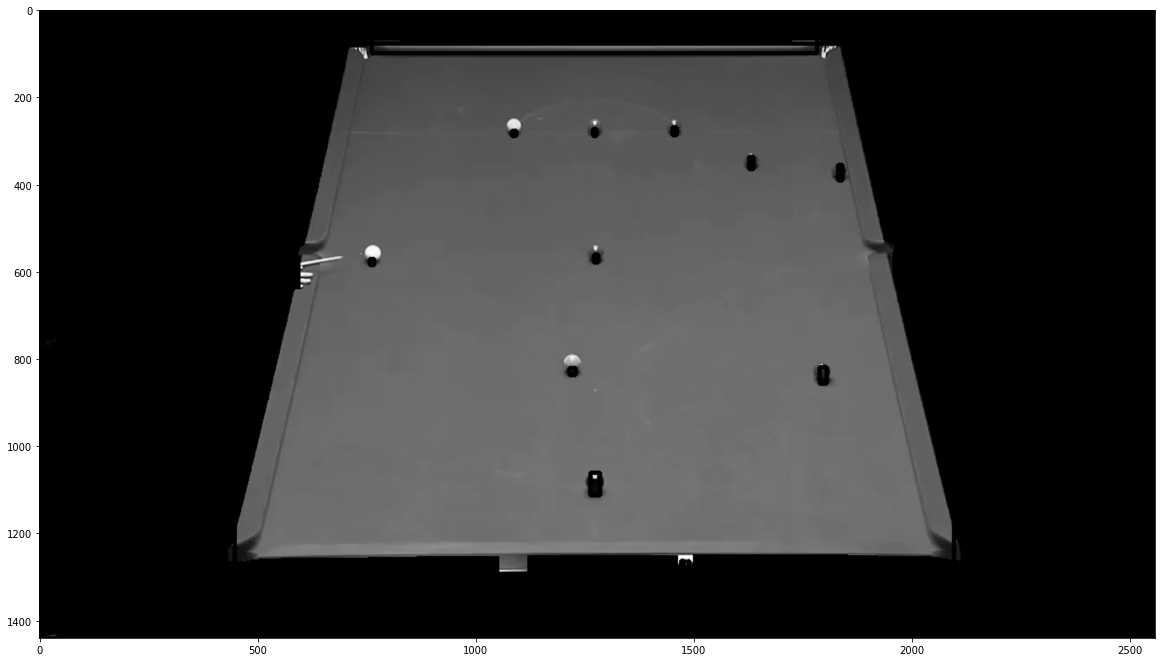

In [ ]:
import statistics
gray = cv2.cvtColor(imm, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#im21, contours1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours1, _ = cv.findContours(thresh,cv.RETR_TREE, cv.CHAIN_APPROX_NONE)   

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])

heightlist.sort()
sportion = int(.5*len(heightlist))
eportion = int(0.08*len(heightlist))
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = gray.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.5*medianheight and w/h > 0.6):
        cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,0,255),3)
        box.append([x,y,x+w,y+h])
    # to show image
#image = 255 - imag  
imgplot = plt.imshow(cv2.resize(imag, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [ ]:
box

[[0, 0, 1280, 720],
 [377, 34, 897, 49],
 [220, 40, 1054, 646],
 [722, 136, 736, 143],
 [631, 138, 644, 144],
 [538, 140, 552, 144],
 [810, 170, 824, 182],
 [912, 179, 926, 195],
 [632, 282, 646, 289],
 [375, 287, 389, 292],
 [891, 411, 908, 428],
 [604, 412, 620, 418],
 [628, 532, 648, 556],
 [741, 633, 750, 637],
 [735, 633, 741, 637]]

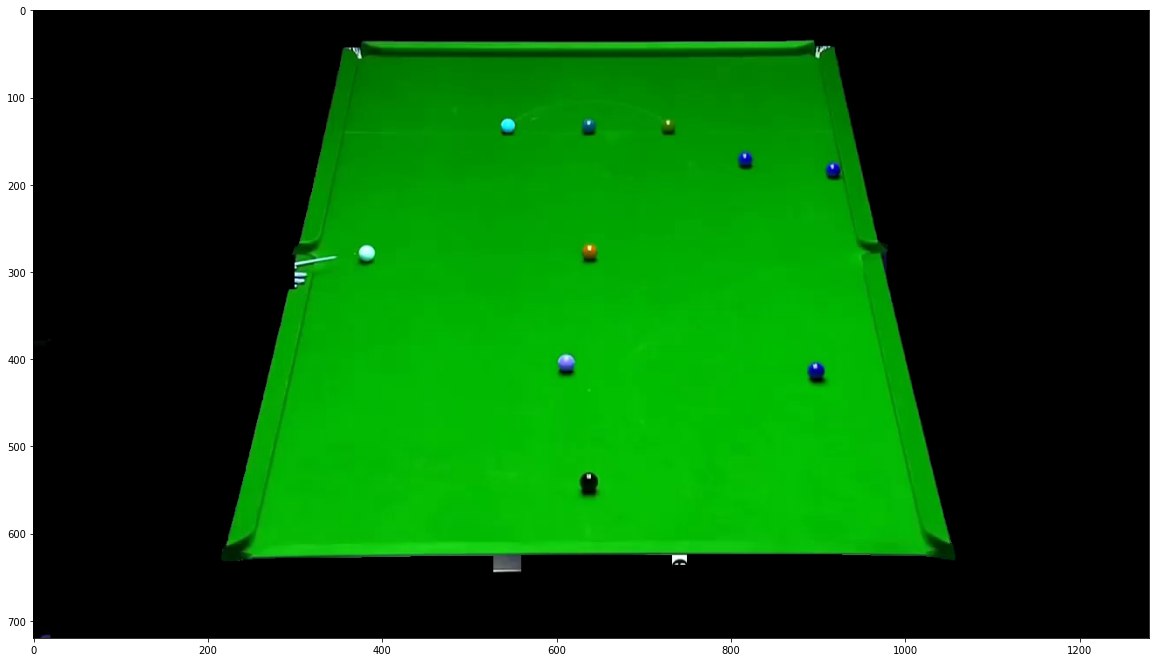

In [ ]:
plt.imshow(table)

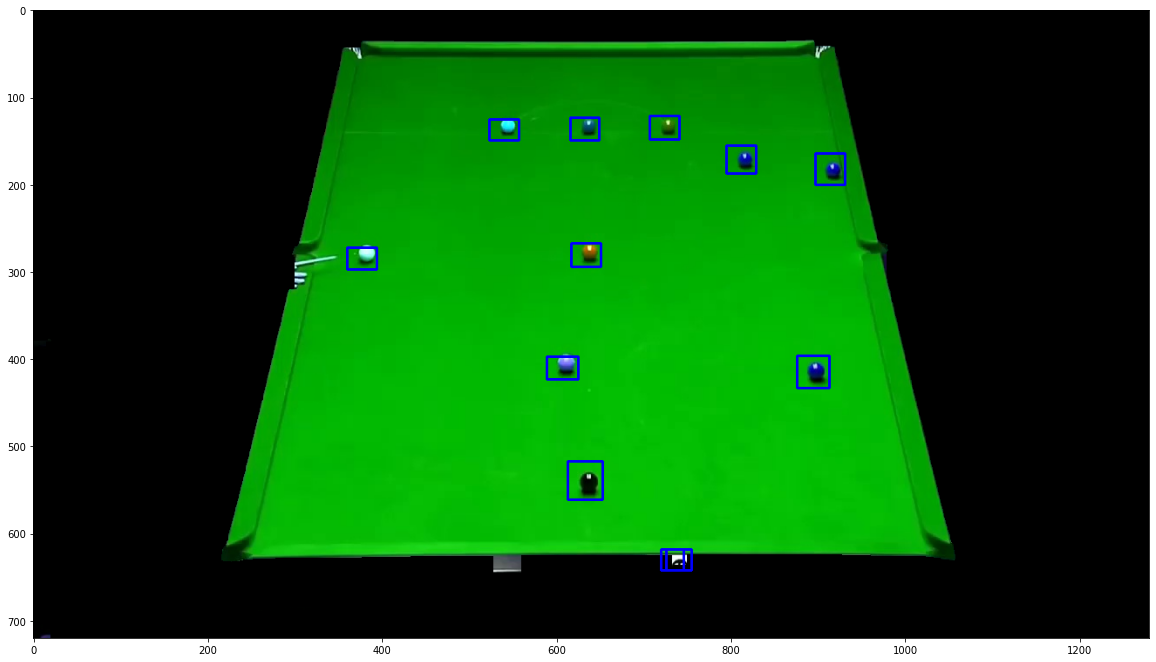

In [ ]:
bs = table.copy()
for i in box:
  if i[2] - i[0] < 25:
    cv2.rectangle(bs,(i[0]-15,i[1]-15),(i[2]+5,i[3]+5),(0,0,255),2)
plt.imshow(bs)

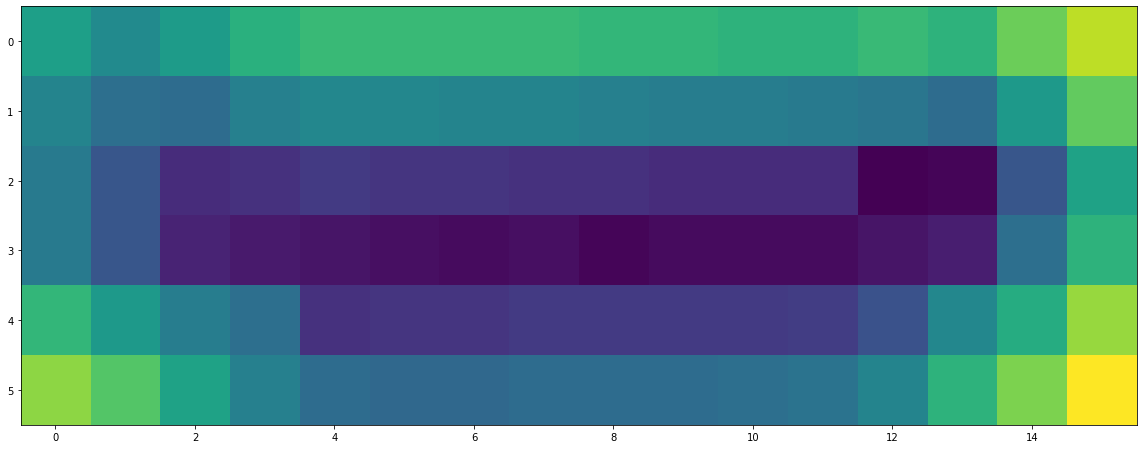

In [ ]:
plt.imshow(gray[412:418,604:620])

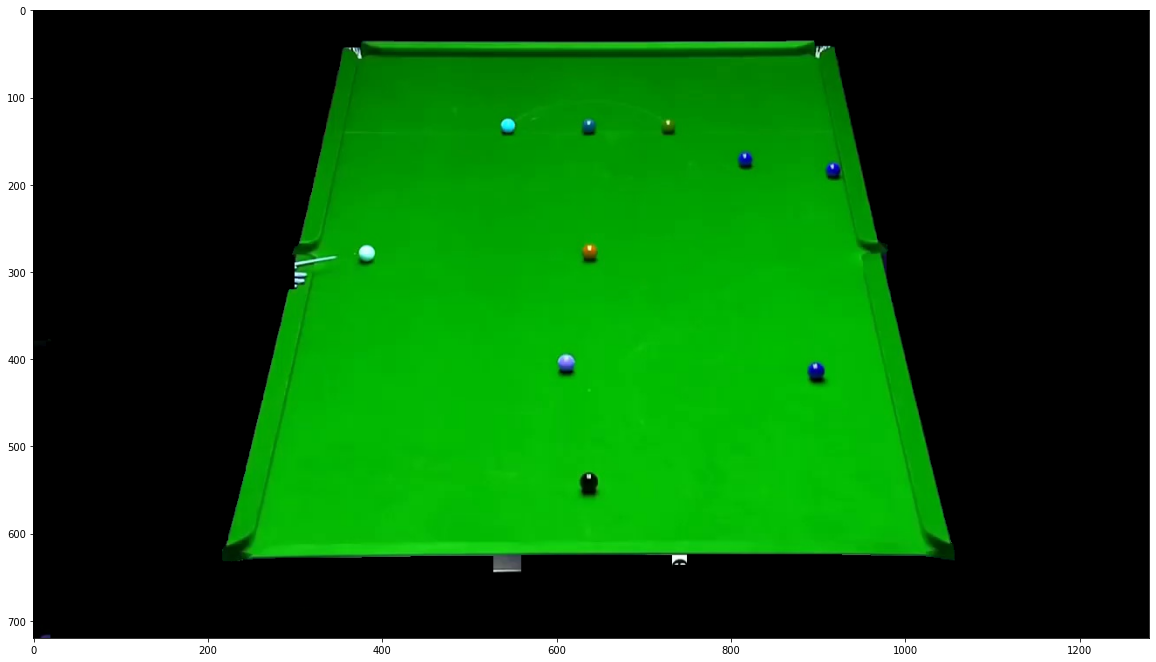

In [ ]:
import cv2
imm = table.copy()
cv2.rectangle(imm,(216,34),(1057,645),(0,0,0),1)
plt.imshow(imm)

In [ ]:
imm.shape

(720, 1280, 3)